<a>Introduction about dataset<br></a>
The dataset used in this notebook contains 5 features or columns.'CustomerID' 'Age', 'Annual Income', 'Spending Score' and 'Gender'. The data seems to be gathered for regular customers in a mall and based on their spending, the customers are assigned a Spending Score.

<a>Objective<br></a>
Our aim is to segment the customers so that targetted marketing can be implemented on the customers. For instance, different categories of customers can be provided with category specific offers, thus leading to increased revenue and profits for the mall stores.

<a>First Lets import all the libraries which we will need further.</a>

In [1]:
import numpy as np
import pandas as pd

#Scikit learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

#Visuals
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from pandas import plotting

#Others
import random
random.seed(42)
import warnings
import os
warnings.filterwarnings("ignore")
from IPython.display import Image
import math

<a>Data Collection</a>

In [2]:
df = pd.read_csv("C:\\Users\\praku\\OneDrive\\Desktop\\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<a>Data Cleaning and Preprocessing</a>

Check if the data has any missing value(s).

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Get a basic statistical summary of the data.

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check number of Males and Females in the Gender column.

In [6]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

We have a feature 'CustomerID' which is unique to each customer and is of no use in analysis and model building. Let's drop the feature.

In [7]:
df = df.drop('CustomerID', axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Clustermap plots a matrix dataset as a hierarchically-clustered heatmap.

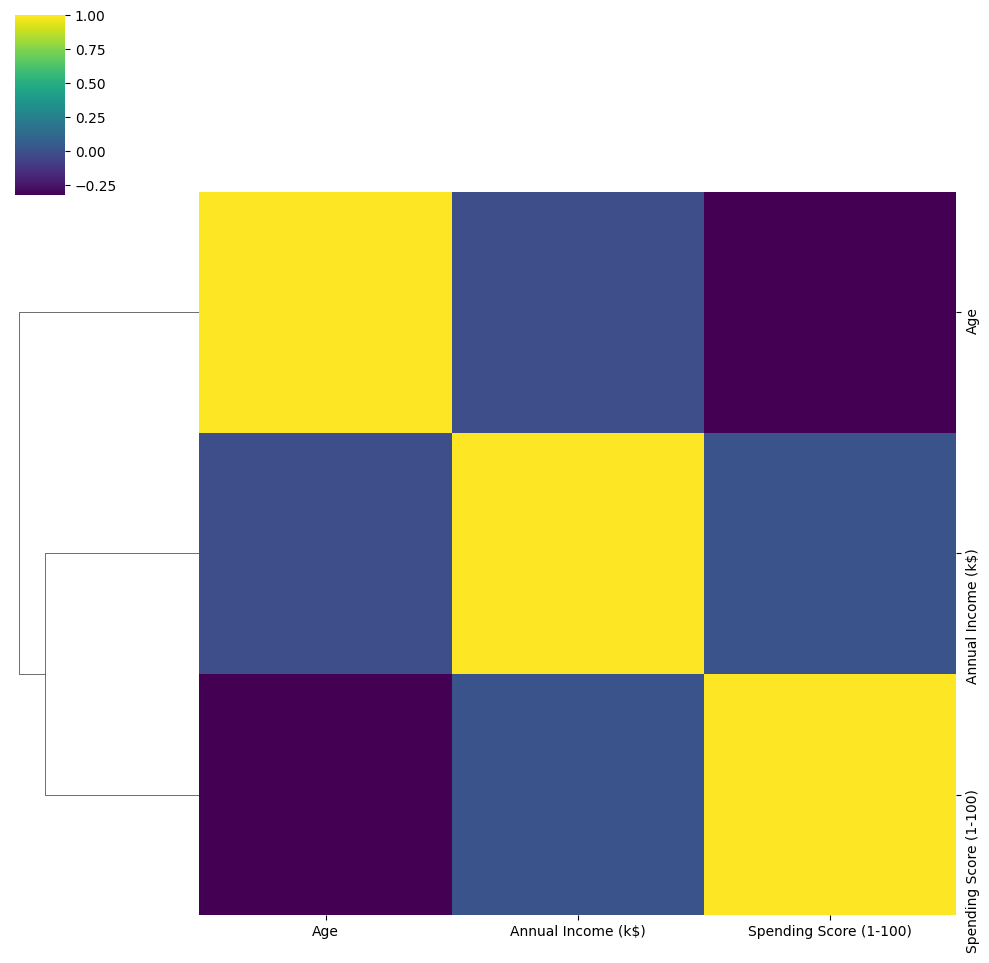

In [8]:
numeric_df = df.select_dtypes(include='number')
sns.clustermap(numeric_df.corr(), cmap='viridis', col_cluster=False)

From the clustermap, we can see that 'Age' is negatively correlated with Spending Score. We can also infer that 'Age' and 'Annual Income' is not related much which is strange. <br>
Let's check if that is the case by plotting a scatterplot between 'Age' and 'Annual Income (k$)' 

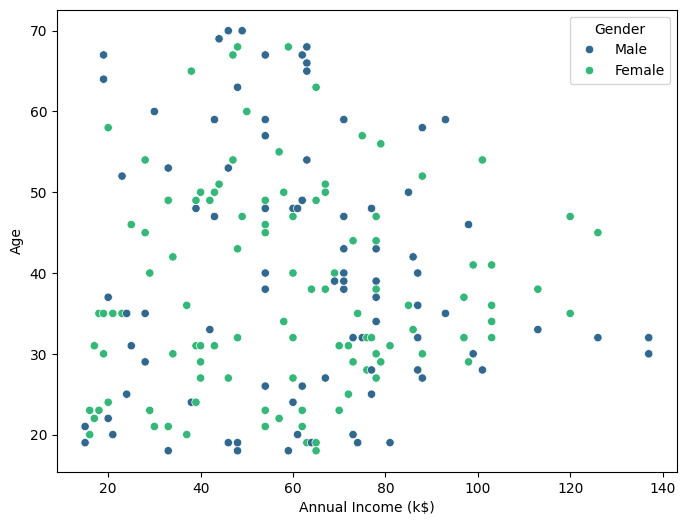

In [9]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Age', hue='Gender', palette='viridis');

As we can see from the above plot, there is no linear relation between 'Age' and 'Annual Income (k$)', which is counter-intuitive.

lets see different scatterplots between the features.

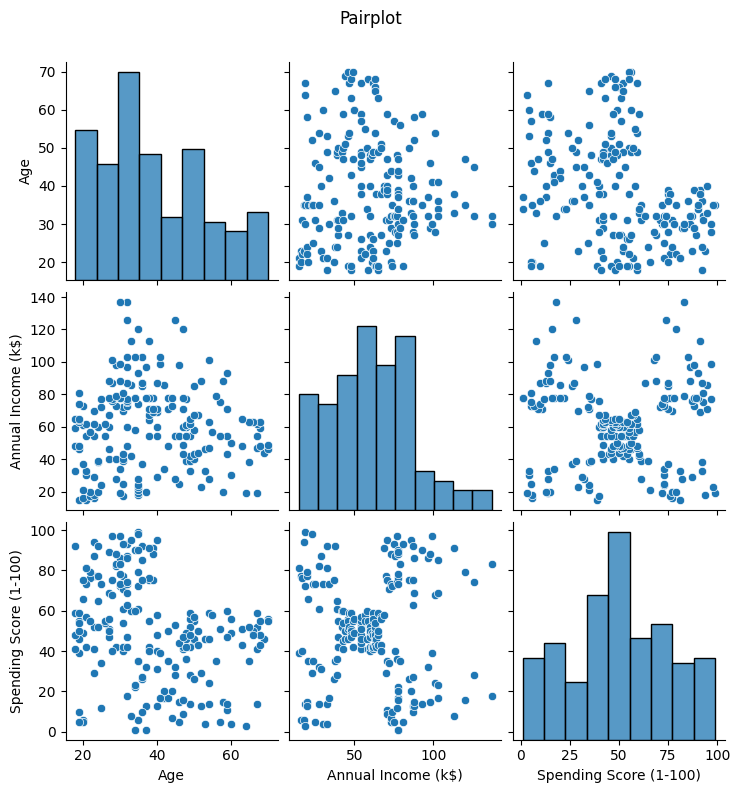

In [10]:
sns.pairplot(df);
plt.suptitle('Pairplot', y=1.05);

Further expanding the scatterplots.

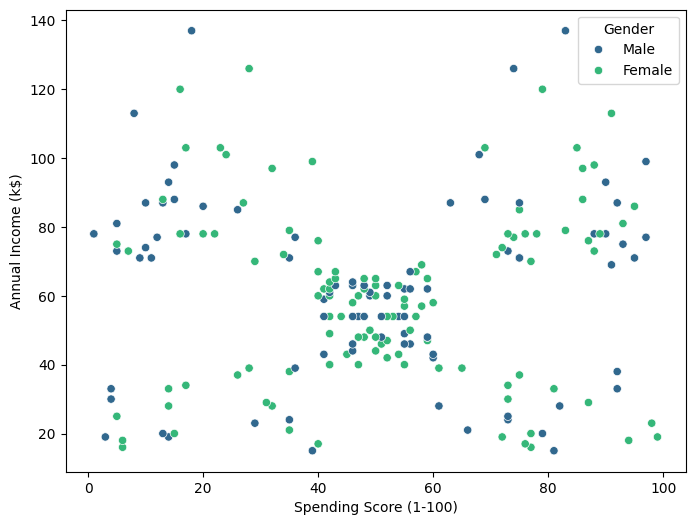

In [11]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender', palette='viridis');

From the above plot, we can already visualize some clusters. Thus, we can say the features 'Spending Score (1-100)' and 'Annual Income (k$)' will have a great impact on the cluster segmentation.

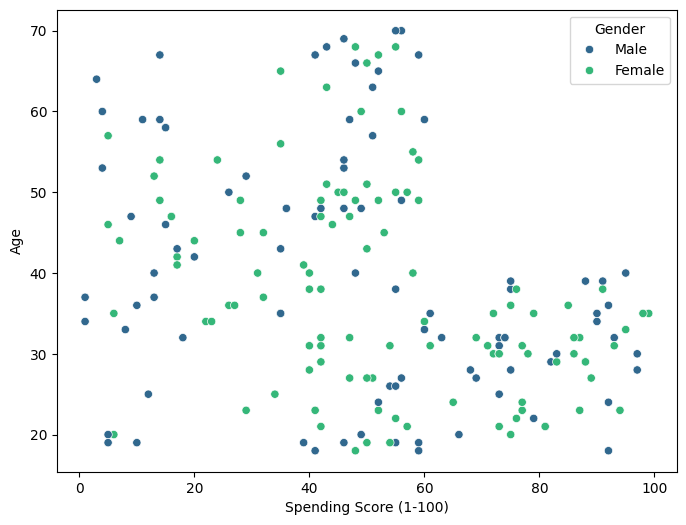

In [12]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Age', hue='Gender', palette='viridis');

Not exact, but there is somewhat a negative relation between 'Age' and 'Spending Score (1-100)'.

Customers with a higher age (40+) have a spending score less than 60. An opposite trend can be seen for young customers (age below 40). Most of them have a spending score above 40 and many are in the 70-100 spending score range.  

<a>Let's visualize the distribution of 'Age', 'Annual Income (k$) and 'Spending Score' (1-100).</a>

<Axes: xlabel='Age', ylabel='count'>

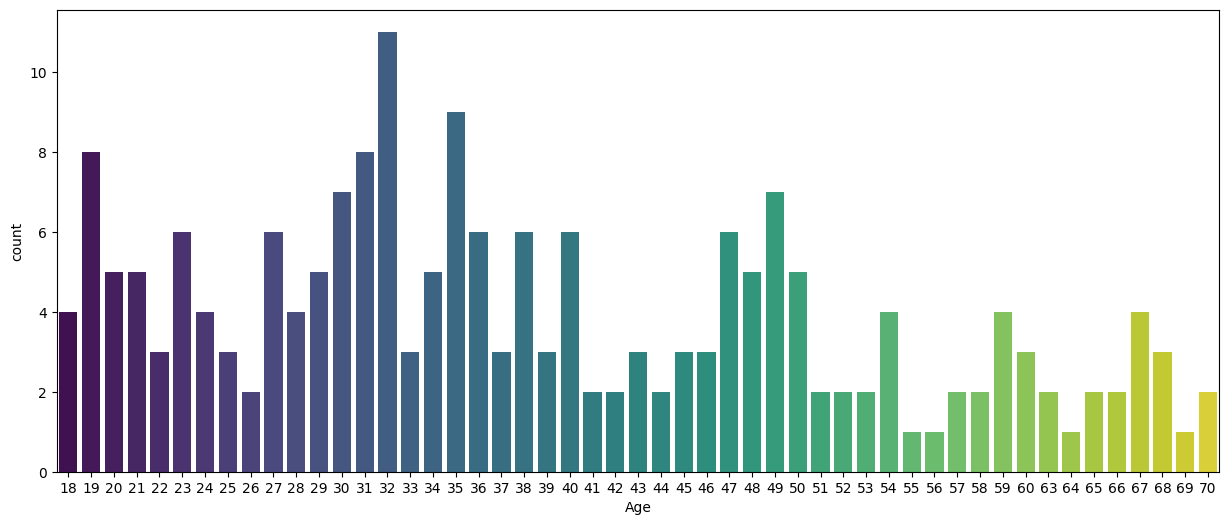

In [13]:
plt.figure(figsize=(15,6),dpi=100)
sns.countplot(data=df, x='Age', palette='viridis')

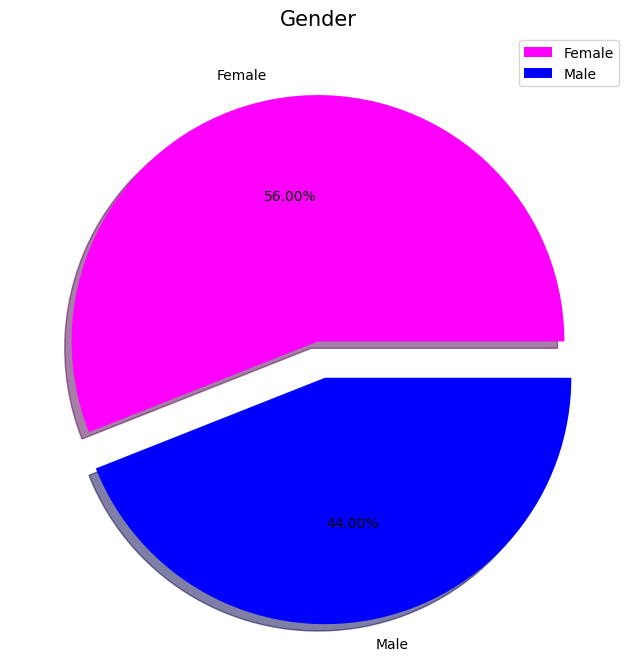

In [14]:
plt.figure(figsize=(8,8))
size = df['Gender'].value_counts()
colors = ['magenta', 'blue']
labels = size.index.tolist()  # Get the unique categories as labels
plt.pie(size, colors=colors, explode=[0, 0.15], labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Gender', fontsize=15)
plt.axis('off')
plt.legend()
plt.show()

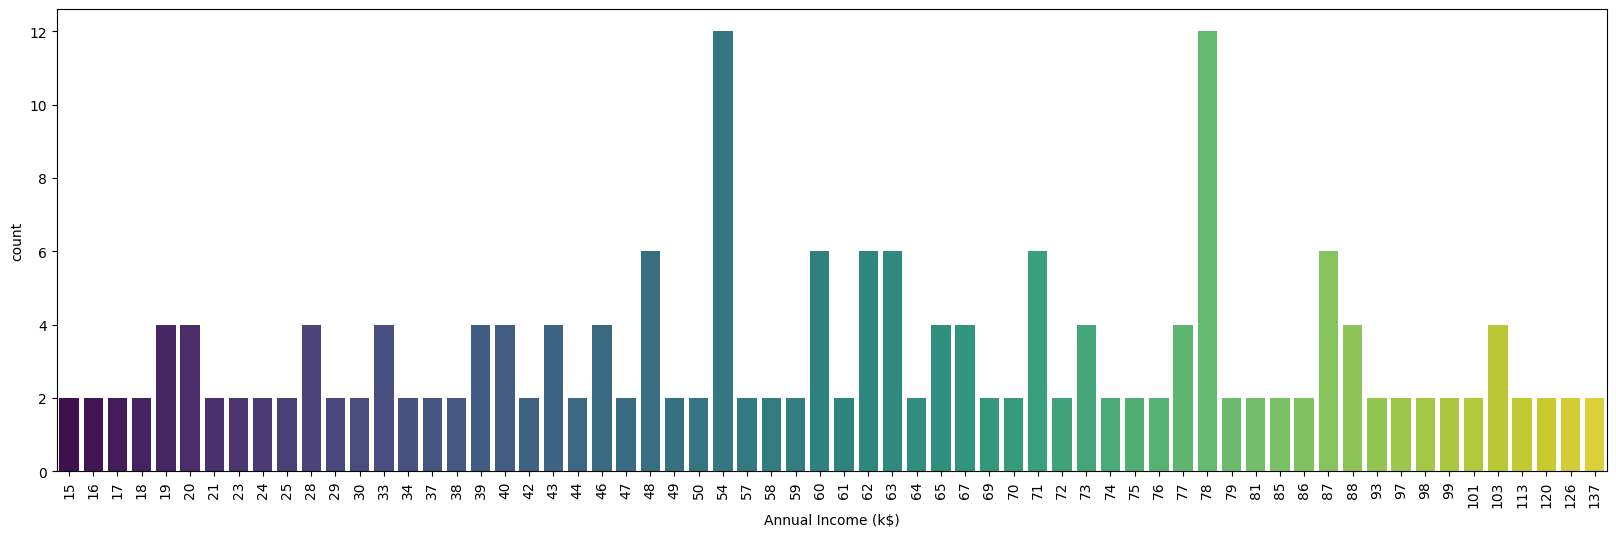

In [15]:
plt.figure(figsize=(20,6),dpi=100)
sns.countplot(data=df, x='Annual Income (k$)', palette='viridis');
plt.xticks(rotation=90);

In [16]:
# Categorical Scatterplot on Gender Vs Annual Income
# sns.catplot(x="Gender", y="Annual Income (k$)", kind="swarm",hue="Gender", data=df.sort_values("Gender"))#box plot

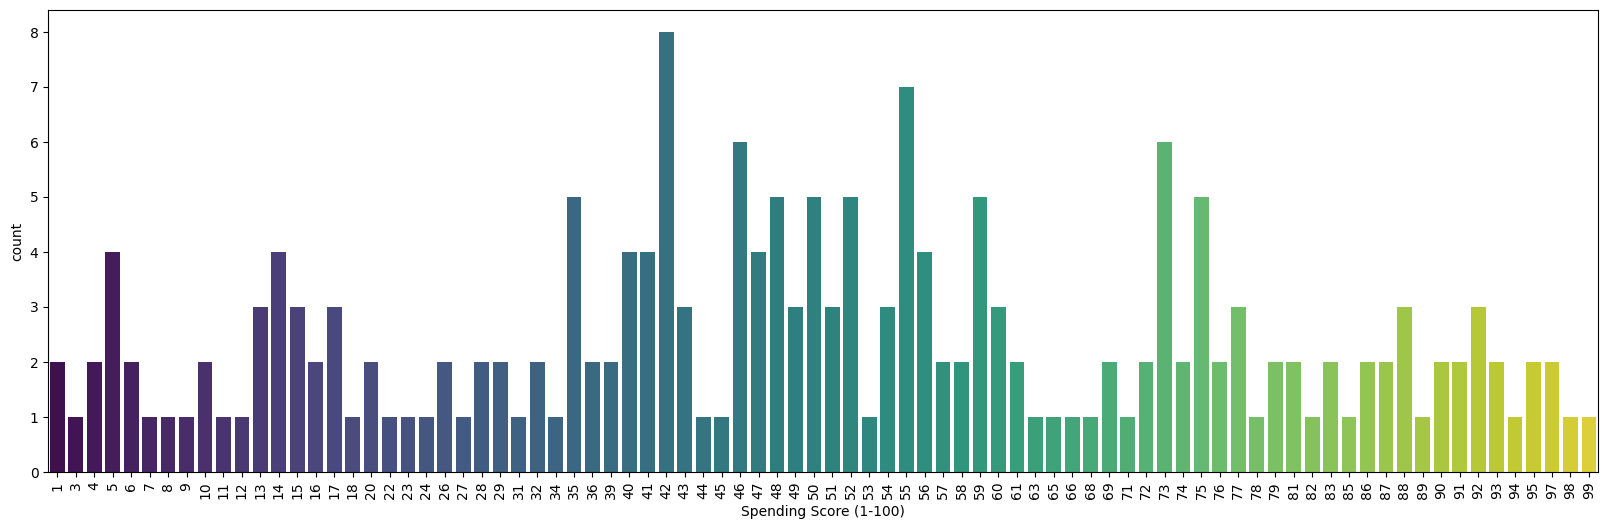

In [17]:
plt.figure(figsize=(20,6),dpi=100)
sns.countplot(data=df, x='Spending Score (1-100)', palette='viridis');
plt.xticks(rotation=90);

The dataset looks pretty uniform.

Let's create boxplots for spending score, annual income and age with respect to gender.

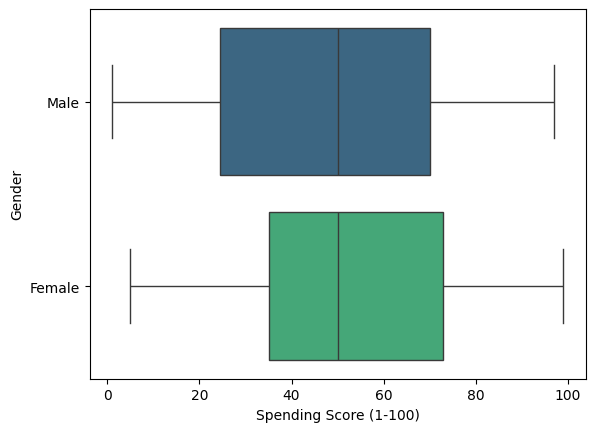

In [18]:
sns.boxplot(data=df, y='Gender', x='Spending Score (1-100)', palette='viridis');

In [19]:
df.groupby('Gender')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


Females on average have a higher spending score by 3 units.

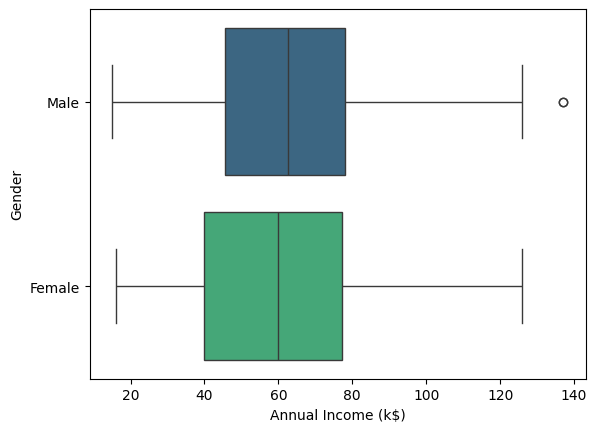

In [20]:
sns.boxplot(data=df, y='Gender', x='Annual Income (k$)', palette='viridis');

In [21]:
df.groupby('Gender')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0


The mean annual income of males is a tad bit higher although the overall distribution is very similar. 

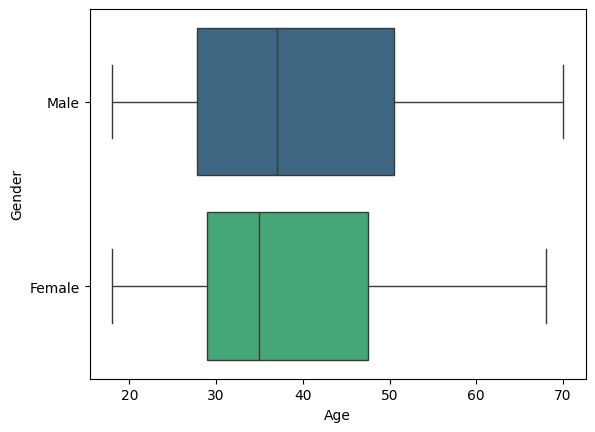

In [22]:
sns.boxplot(data=df, y='Gender', x='Age', palette='viridis');

In [23]:
df.groupby('Gender')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0


The average age of females who shop in the mall and are listed in the dataset is around 2 years less than males.

Analysis done.

<a>Data Preparation and Scaling</a>


Creating Dummies

We have the 'Gender' feature as a categorical one, let's convert it into dummies. <br>
Dummies create a separate boolean column for all unique values of a feature. In this case, there are just 2 unique components in the 'Gender' column. So 2 columns will be created when we call 'gt_dummies', and where the customer is a female, the boolean column corresponding to the female value will be 1 and the boolean column corresponding to the male value will be 0. <br>
When it's a 1 in the boolean female column, it is understood that the boolean male column will have a 0. Hence, usually we drop a boolean column using 'drop_first=True'.

In [24]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


<a>Scaling</a>

Since the clusturing algos use distance as a metric to create categories, we need to scale the data.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

<a>Creating Models for Analysis</a>

<a>K Means</a>

In [27]:
from sklearn.cluster import KMeans

In [28]:
ssd = [] # An empty list for sum of squared distances to be appended for k values 2 to 30

for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    ssd.append(model.inertia_)
    # model.inertia_: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided 
    # (from documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Plotting ssd vs k values.

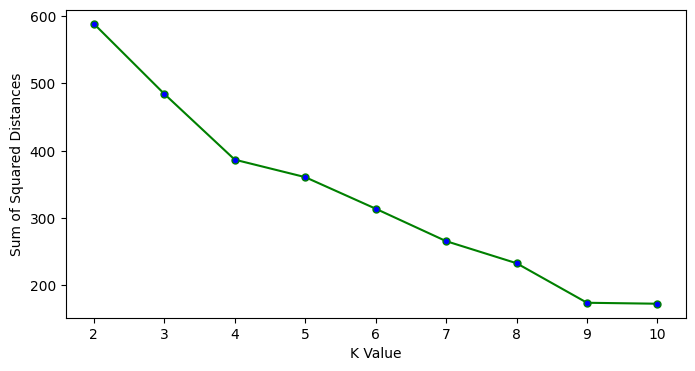

In [29]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(2,11), ssd, marker='o', color='green', markerfacecolor='blue', markersize=5);
plt.xlabel("K Value");
plt.ylabel("Sum of Squared Distances");

There is no clear 'elbow' but k = 5 seems to be a good choice as the ssd has decreased noticably by the time k value reaches 5. 

Let's create a model with no. of clusters = 5.

In [30]:
model = KMeans(n_clusters=5)
model.fit(scaled_df)

KMeans(n_clusters=5)

The generated labels or categories for the customers. Note that the labels 0 to 5 can change if we re-run the code, i.e., all the customers currently assigned cluster 4 can become 2 or 5 if we re-run the code. But the customers who are alloted a particular category will remain the same.

In [31]:
k_means_labels = model.fit_predict(df)
k_means_labels

array([4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Let's plot a 3-D scatterplot along with the customers separated by gender based on shapes - circle and diamond.

In [32]:
import plotly.express as px #for creating 3D plots
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=model.fit_predict(df), symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))

K means is done our data! It is precisely categorising the customers in 5 clusters. 

<a>Hierarchical Clustering</a>

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [35]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0) # each point starts as its own cluster

In [36]:
cluster_labels = model.fit_predict(df)
cluster_labels # each point gets its own label since distance_threshold=0

array([195, 132, 103, 197, 189, 166, 117, 135, 153, 129, 199, 172, 177,
       188, 139, 159, 184, 147, 157, 181, 171, 140, 143, 104, 127, 111,
       156, 123, 108, 119, 116, 109, 121, 113, 175, 124, 173, 163, 191,
       165, 100, 112, 110, 174, 120, 183, 144, 131, 196, 155, 182, 176,
       142, 133,  82, 138, 178, 136, 125, 141,  91, 154, 170, 134, 169,
        99, 128, 185, 114, 107,  65, 187, 101,  61, 164,  88,  93, 126,
        56,  85, 115,  57, 137, 190,  87, 198,  81, 186, 179, 160,  77,
        69, 192, 130, 193,  43, 102, 167,  62,  79, 194,  94,  64,  76,
       149, 150,  97,  70, 148, 106, 180, 122,  89,  86,  96, 151,  54,
        92, 145, 118,  63,  74,  31, 162, 146,  59,  55, 161,  58,  98,
       168,  27,  28,  46, 152,  72,  34,  50,  73,  40,  75,  71,  80,
        83,  49,  66,  53,  95,  84,  13,  90,  44,  35,  60, 158,  36,
        45,  37,  29,  67,  39,  51,  47,  42,  30,  21,  48,  19,  22,
        41,  78,  68,  33,  16, 105,  26,  17,  32,  20,  15,  5

In [37]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[:][:5] # display only 5 rows

array([[ 76.        , 113.        ,   1.41421356,   2.        ],
       [ 43.        ,  88.        ,   1.41421356,   2.        ],
       [  9.        ,  47.        ,   1.41421356,   2.        ],
       [ 49.        ,  91.        ,   1.41421356,   2.        ],
       [ 24.        ,  93.        ,   1.41421356,   2.        ]])

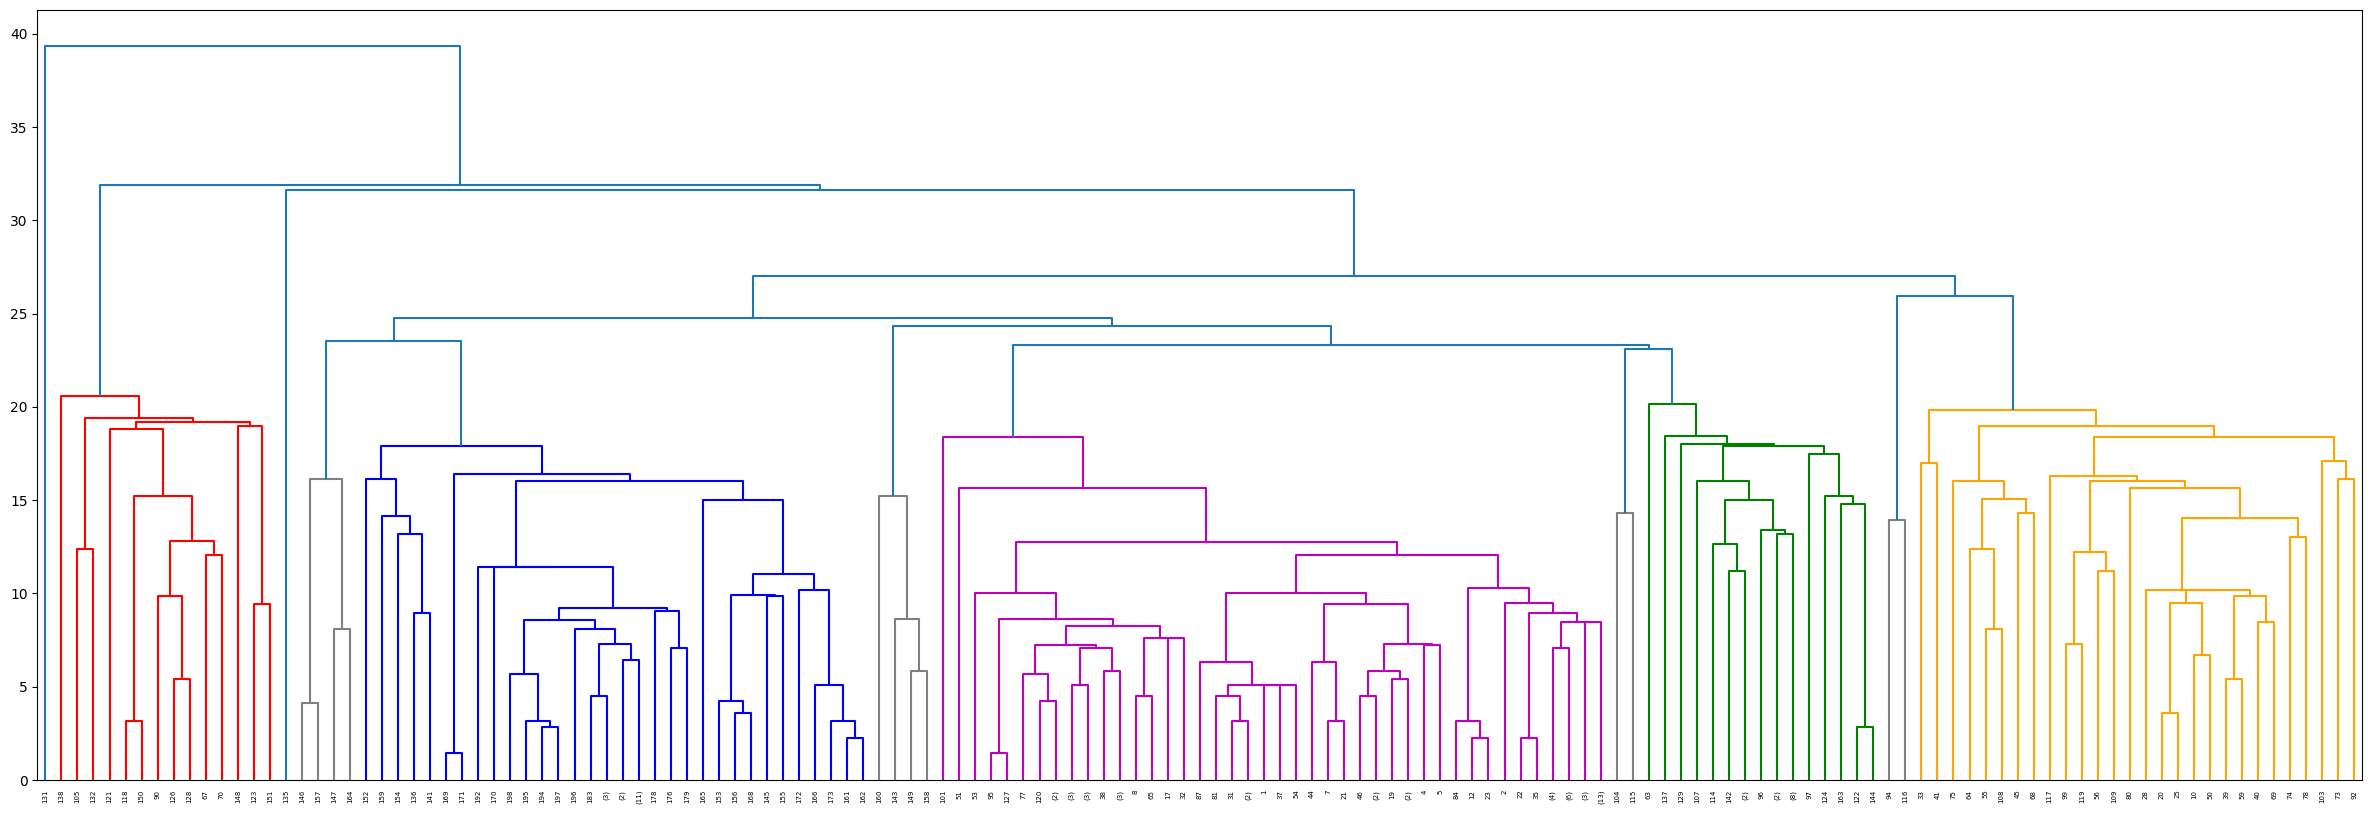

In [38]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','grey', 'b', 'grey', 'm', 'grey', 'g', 'grey', 'orange']) # set colors for the clusters
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=15, color_threshold=23) # color_threshold=23 sets clusters below y-axis value of 23 to be of the same color

We see mainly 5 clusters being formed. This again justifies the k value we opted for in k means clustering.

Let's build the model with 5 clusters.

In [39]:
model = AgglomerativeClustering(n_clusters=5)

In [40]:
model.fit_predict(df) # predict the categories for each point.

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [41]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=model.fit_predict(df), symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
# fig.show()

In line with k means, in hierarchical clusturing too, all points are well separated and the algo works well.

<a>DBSCAN</a>

In [42]:
from sklearn.cluster import DBSCAN

In DBSCAN, there are 2 main parameters that can be adjusted, 'epsilon' (eps) and 'min_samples'.<br>
We have 4 features so 'min_samples' value will be 8.<br>

In [43]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=8)
    dbscan.fit(scaled_df)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

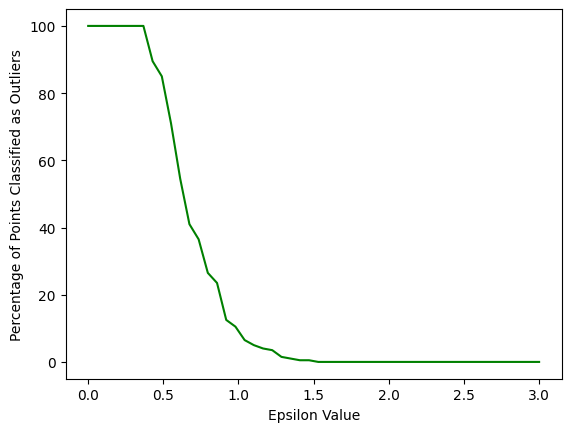

In [44]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

The 'elbow' forms somewhere around epsilon = 1.2.<br>
Let's create a model wil epsilon value 1.2 and minimum number of samples 8.

In [45]:
dbscan = DBSCAN(eps=1.2,min_samples=8)
dbscan.fit(scaled_df)

DBSCAN(eps=1.2, min_samples=8)

In [46]:
dbscan.labels_

array([ 0,  0,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  0,  1,
        0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0, -1, -1], dtype=int64)

In [47]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=dbscan.labels_, symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))

DBSCAN, with the set parameters does not perform well for this dataset. It divides the points into 2 classes and outliers.

Although not suggested, let's use df to create the model again instead of scaled_df. This is a trial and error method to see if this makes the model any better for the given dataset.

In [48]:
dbscan = DBSCAN(eps=1.2,min_samples=8)
dbscan.fit(df)

DBSCAN(eps=1.2, min_samples=8)

In [49]:
outlier_percent = []

for eps in np.linspace(0.001,20,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2)
    dbscan.fit(df) # notice df instead of scaled_df
   
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

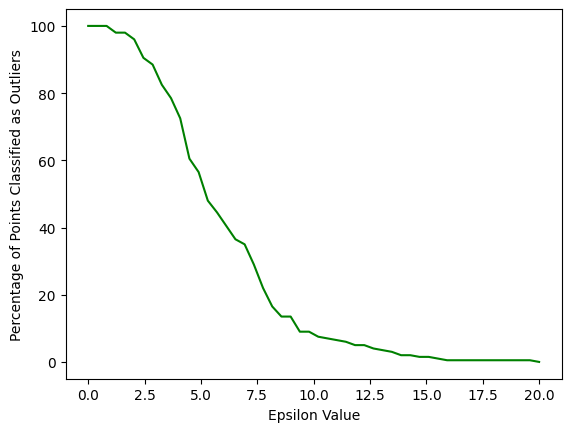

In [50]:
sns.lineplot(x=np.linspace(0.001,20,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

The 'elbow' in this case is being formed around epsilon value 12.

In [51]:
dbscan = DBSCAN(eps=12,min_samples=8)
dbscan.fit(df)

DBSCAN(eps=12, min_samples=8)

In [52]:
dbscan.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1,  0, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2, -1,  2,  1,  2, -1,  2,  3,  2, -1,  2, -1,  2,
        3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3,
        2,  3,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [53]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=dbscan.labels_, symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))

DBSCAN done with our data. But dont give a clear idea about the data.

<a></b> Conclusion</a>

Both k means and hierarchical clustering methods worked well. Let's create a new column with the generated cluster labels in k means.

In [54]:
df['labels'] = k_means_labels

In [55]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,labels
0,19,15,39,True,4
1,21,15,81,True,4
2,20,16,6,False,3
3,23,16,77,False,4
4,31,17,40,False,3


The final clustered dataset looks like:

In [56]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='labels', opacity=0.75)
fig.show()

Notice there are no outliers (no points in -1 label).

Based on the annual income, spending score values for the clusters, we can understand the type of customers in each cluster. <br>
From the above 3-D plot, we infer that in each cluster, customers of all ages are present. So age is not a distinguishing feature for differnt clusters.

Renaming the clusters for our better understanding.

In [57]:
df['labels'] = df['labels'].map({
    0: 'high income & lavish lifestyle', # blue cluster
    1: 'average income & average lifestyle', # purple cluster
    2: 'high income & meagre lifestyle', # pink cluster
    3: 'low income & meagre lifestyle', # orange cluster
    4: 'low income & lavish lifestyle'}) # yellow cluster

In [58]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,labels
0,19,15,39,True,low income & lavish lifestyle
1,21,15,81,True,low income & lavish lifestyle
2,20,16,6,False,low income & meagre lifestyle
3,23,16,77,False,low income & lavish lifestyle
4,31,17,40,False,low income & meagre lifestyle


One final change we need to do -: convert 'Gender_Male' column to 'Gender' column with values 'Male' and 'Female' instead of 1 and 0 respectively.

In [59]:
df['Gender'] = df['Gender_Male'].map({1: 'Male', 0: 'Female'})
df = df.drop('Gender_Male', axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),labels,Gender
0,19,15,39,low income & lavish lifestyle,NaN
1,21,15,81,low income & lavish lifestyle,NaN
2,20,16,6,low income & meagre lifestyle,NaN
3,23,16,77,low income & lavish lifestyle,NaN
4,31,17,40,low income & meagre lifestyle,NaN


We have completed our objective successfully!!

Now we have classified the customers into 5 categories by which now the mall can put offers and maximize their profits.